In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


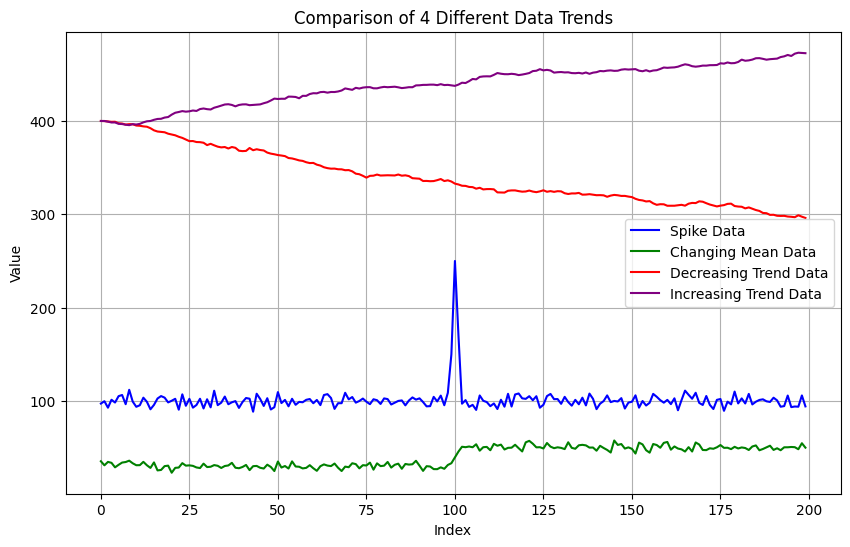

In [12]:

n = 200  # số lượng dữ liệu

# Tạo danh sách để lưu các loại dữ liệu
data_types = ["spike", "mean_change", "decreasing", "increasing"]

# Vòng lặp để tạo ra dữ liệu
x_spike = None
x_mean = None
x_decreasing = None
x_increasing = None

for data_type in data_types:
    if data_type == "spike":
        x_spike = 100 + 5 * np.random.normal(0, 1, n)
        x_spike[99] = 150
        x_spike[100] = 250
        x_spike[101] = 170
    elif data_type == "mean_change":
        x_mean = np.zeros(n)
        x_mean[:100] = 30 + 3 * np.random.normal(0, 1, 100)
        x_mean[101:] = 50 + 3 * np.random.normal(0, 1, 99)
        x_mean[100] = (x_mean[99] + x_mean[101]) / 2
    elif data_type == "decreasing":
        x_decreasing = np.zeros(n)
        x_decreasing[0] = 400
        for t in range(1, n):
            x_decreasing[t] = x_decreasing[t-1] - 0.5 - np.random.normal(0, 1)
    elif data_type == "increasing":
        x_increasing = np.zeros(n)
        x_increasing[0] = 400
        for t in range(1, n):
            x_increasing[t] = x_increasing[t-1] + 0.5 - np.random.normal(0, 1)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Vẽ các loại dữ liệu
if x_spike is not None:
    plt.plot(x_spike, label="Spike Data", linestyle='-', color='blue')
if x_mean is not None:
    plt.plot(x_mean, label="Changing Mean Data", linestyle='-', color='green')
if x_decreasing is not None:
    plt.plot(x_decreasing, label="Decreasing Trend Data", linestyle='-', color='red')
if x_increasing is not None:
    plt.plot(x_increasing, label="Increasing Trend Data", linestyle='-', color='purple')

# Thêm tiêu đề và nhãn
plt.title("Comparison of 4 Different Data Trends")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()


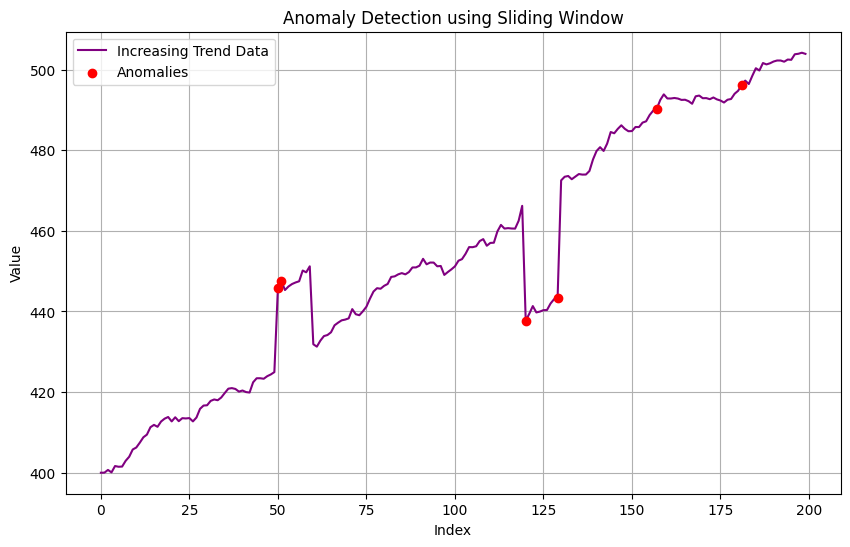

Detected anomalies at indices: [np.int64(50), np.int64(51), np.int64(120), np.int64(129), np.int64(157), np.int64(181)]


In [ ]:
#Sliding Window
# Tạo dữ liệu xu hướng tăng
n = 200
x_increasing = np.zeros(n)
x_increasing[0] = 400
for t in range(1, n):
    x_increasing[t] = x_increasing[t-1] + 0.5 - np.random.normal(0, 1)

# Tạo một vài thay đổi đột ngột trong dữ liệu (bất thường)
x_increasing[50:60] += 20
x_increasing[120:130] -= 30

# Cửa sổ trượt (Sliding Window)
window_size = 20  # Kích thước cửa sổ
threshold = 3  # Ngưỡng Z-score để xác định bất thường

# Hàm phát hiện bất thường trong cửa sổ
def detect_anomalies_window(data, window_size, threshold):
    anomalies = []
    for i in range(len(data) - window_size):
        window = data[i:i+window_size]
        mean = np.mean(window)
        std_dev = np.std(window)
        z_scores = (window - mean) / std_dev
        
        # Nếu có giá trị nào trong cửa sổ có Z-score lớn hơn ngưỡng, coi đó là bất thường
        if np.any(np.abs(z_scores) > threshold):
            anomalies.append(i + np.argmax(np.abs(z_scores)))  # Lưu vị trí bất thường
    
    return anomalies

# Phát hiện bất thường trong dữ liệu
anomalies = detect_anomalies_window(x_increasing, window_size, threshold)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(x_increasing, label="Increasing Trend Data", color='purple')

# Vẽ các điểm bất thường
plt.scatter(anomalies, x_increasing[anomalies], color='red', label="Anomalies", zorder=5)
plt.title("Anomaly Detection using Sliding Window")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# In kết quả các điểm bất thường
print("Detected anomalies at indices:", anomalies)


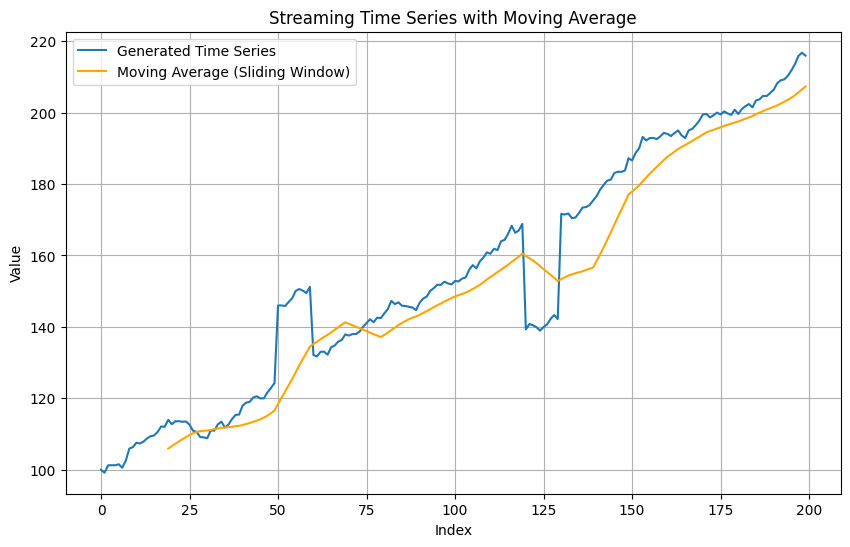

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Tạo dữ liệu luồng giả lập (dữ liệu có xu hướng tăng với sự biến động ngẫu nhiên)
n = 200
x = np.zeros(n)
x[0] = 100
for t in range(1, n):
    x[t] = x[t-1] + 0.5 + np.random.normal(0, 1)

# Chèn bất thường
x[50:60] += 20  # Bất thường tăng mạnh
x[120:130] -= 30  # Bất thường giảm mạnh

# Cửa sổ trượt với kích thước cửa sổ là 20
window_size = 20
window = deque(maxlen=window_size)

# Lưu trữ các giá trị trung bình của cửa sổ
moving_averages = []

# Quá trình duyệt qua dữ liệu và tính toán trung bình động (Moving Average) trong cửa sổ
for i in range(n):
    window.append(x[i])
    if len(window) == window_size:
        moving_averages.append(np.mean(window))

# Vẽ đồ thị dữ liệu luồng
plt.figure(figsize=(10, 6))
plt.plot(x, label="Generated Time Series")
plt.plot(range(window_size-1, n), moving_averages, label="Moving Average (Sliding Window)", color='orange')
plt.title("Streaming Time Series with Moving Average")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


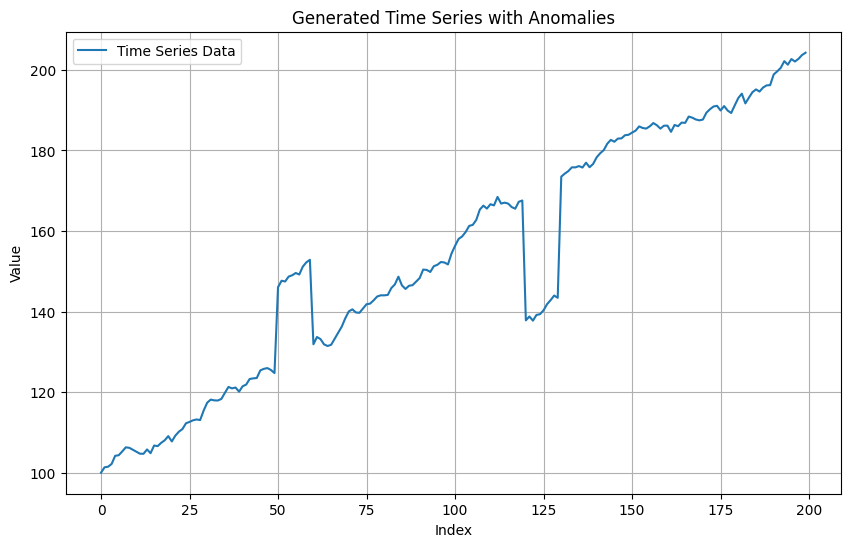

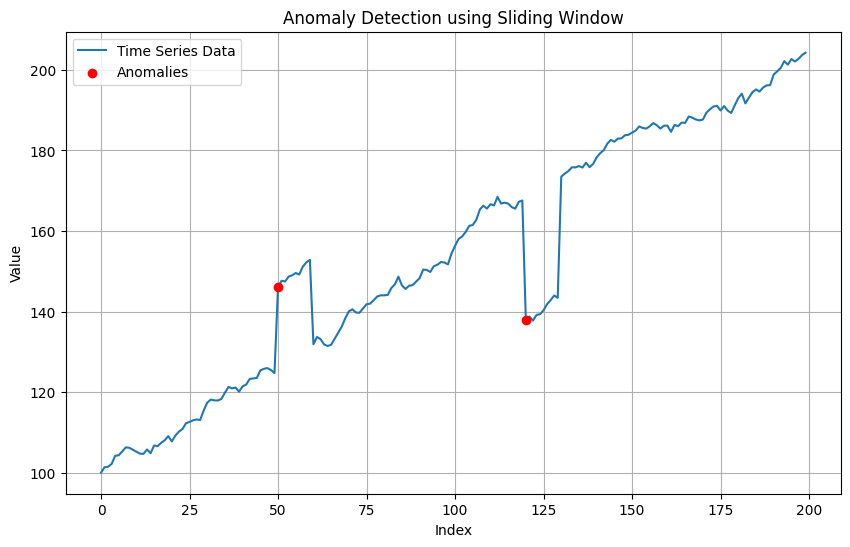

Anomalies detected at indices: [50, 120]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Tạo chuỗi thời gian có xu hướng tăng và chèn bất thường
n = 200
data = np.zeros(n)
data[0] = 100
for i in range(1, n):
    data[i] = data[i-1] + 0.5 + np.random.normal(0, 1)

# Chèn bất thường vào dữ liệu
data[50:60] += 20  # Bất thường tăng mạnh
data[120:130] -= 30  # Bất thường giảm mạnh

# Vẽ dữ liệu chuỗi thời gian
plt.figure(figsize=(10, 6))
plt.plot(data, label="Time Series Data")
plt.title("Generated Time Series with Anomalies")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Phát hiện bất thường bằng cửa sổ trượt (Sliding Window)
window_size = 20
window = deque(maxlen=window_size)
moving_averages = []

# Phát hiện bất thường
threshold = 3  # Ngưỡng chênh lệch để coi là bất thường
anomalies = []

for i in range(n):
    window.append(data[i])
    if len(window) == window_size:
        # Tính trung bình và độ lệch chuẩn của cửa sổ
        mean_window = np.mean(window)
        std_window = np.std(window)

        # So sánh giá trị với ngưỡng bất thường
        if np.abs(data[i] - mean_window) > threshold * std_window:
            anomalies.append(i)

# Vẽ lại chuỗi thời gian với các điểm bất thường
plt.figure(figsize=(10, 6))
plt.plot(data, label="Time Series Data")
plt.scatter(anomalies, data[anomalies], color='red', label="Anomalies", zorder=5)
plt.title("Anomaly Detection using Sliding Window")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# In ra chỉ số của các điểm bất thường
print(f"Anomalies detected at indices: {anomalies}")


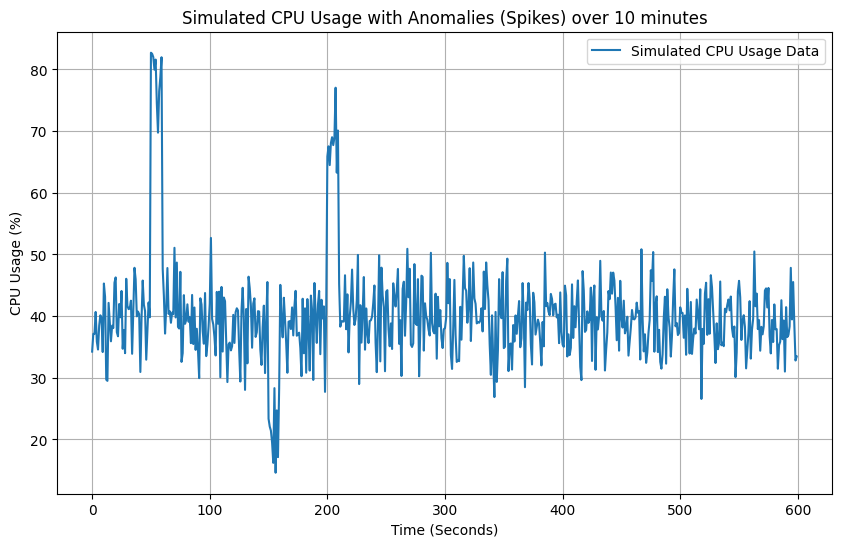

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Thiết lập tham số
n = 600  # Số lượng điểm dữ liệu (tính theo giây - ví dụ: 10 phút)
normal_cpu_usage = 40  # Mức sử dụng CPU bình thường
noise_factor = 5  # Mức độ nhiễu ngẫu nhiên

# Giả lập chuỗi thời gian CPU usage với mức bình thường
cpu_data = normal_cpu_usage + noise_factor * np.random.randn(n)

# Thêm các bất thường (spikes, fluctuations)
cpu_data[50:60] += 40  # Spike lớn tại khoảng thời gian từ 50 đến 60 giây
cpu_data[150:160] -= 20  # Giảm đột ngột tại khoảng thời gian từ 150 đến 160 giây
cpu_data[200:210] += 30  # Spike khác tại khoảng thời gian từ 200 đến 210 giây

# Vẽ đồ thị dữ liệu CPU usage
plt.figure(figsize=(10, 6))
plt.plot(cpu_data, label="Simulated CPU Usage Data")
plt.title("Simulated CPU Usage with Anomalies (Spikes) over 10 minutes")
plt.xlabel("Time (Seconds)")
plt.ylabel("CPU Usage (%)")
plt.legend()
plt.grid(True)
plt.show()


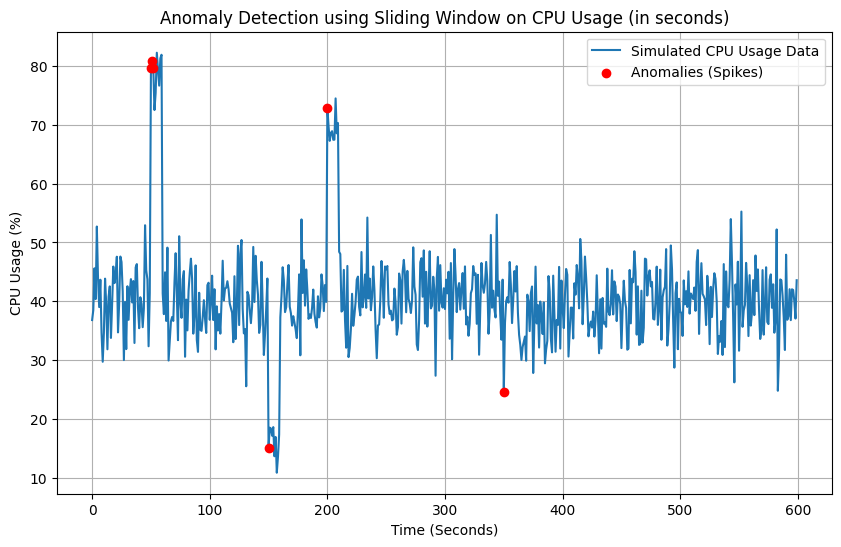

Anomalies detected at indices (in seconds): [50, 51, 52, 150, 200, 350]


In [25]:
# Phát hiện bất thường bằng cửa sổ trượt (Sliding Window)
window_size = 50  # Kích thước cửa sổ (tính theo giây)
window = deque(maxlen=window_size)
moving_averages = []

# Phát hiện bất thường
threshold = 3  # Ngưỡng bất thường (đơn vị là độ lệch chuẩn)
anomalies = []

for i in range(n):
    window.append(cpu_data[i])
    if len(window) == window_size:
        # Tính trung bình và độ lệch chuẩn của cửa sổ
        mean_window = np.mean(window)
        std_window = np.std(window)

        # So sánh giá trị tại chỉ số hiện tại với ngưỡng bất thường
        if np.abs(cpu_data[i] - mean_window) > threshold * std_window:
            anomalies.append(i)

# Vẽ lại chuỗi thời gian với các điểm bất thường
plt.figure(figsize=(10, 6))
plt.plot(cpu_data, label="Simulated CPU Usage Data")
plt.scatter(anomalies, cpu_data[anomalies], color='red', label="Anomalies (Spikes)", zorder=5)
plt.title("Anomaly Detection using Sliding Window on CPU Usage (in seconds)")
plt.xlabel("Time (Seconds)")
plt.ylabel("CPU Usage (%)")
plt.legend()
plt.grid(True)
plt.show()

# In ra chỉ số của các điểm bất thường
print(f"Anomalies detected at indices (in seconds): {anomalies}")


Detecting anomalies in Spike data:


  Z-score anomalies: [ 99 100 101]
  IQR anomalies: [ 99 100 101 150 154]
  Isolation Forest anomalies: [  2  25  70  77  99 100 101 150 154 166]


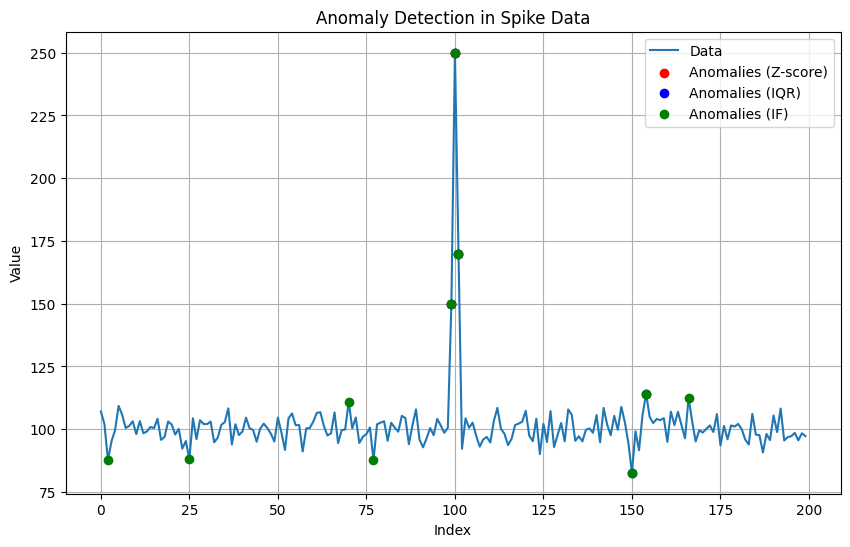

Detecting anomalies in Changing Mean data:
  Z-score anomalies: []
  IQR anomalies: []
  Isolation Forest anomalies: [ 46  65  72  98 100 105 161 172 180 195]


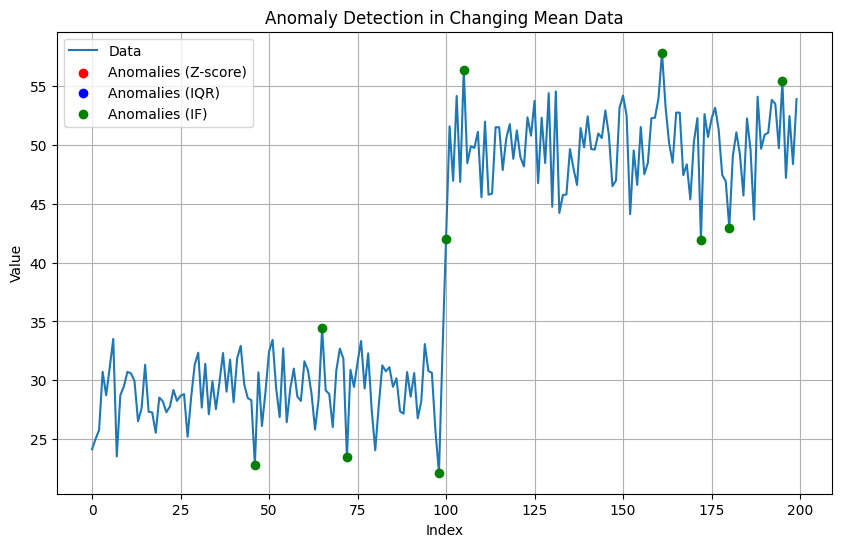

Detecting anomalies in Decreasing Trend data:
  Z-score anomalies: []
  IQR anomalies: []
  Isolation Forest anomalies: [  2   5   7   9  10  28 194 197 198 199]


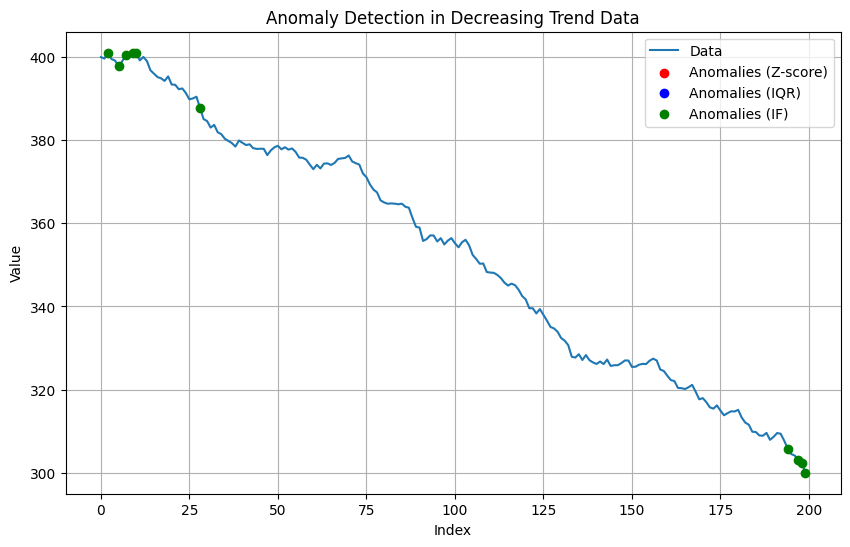

Detecting anomalies in Increasing Trend data:
  Z-score anomalies: []
  IQR anomalies: []
  Isolation Forest anomalies: [  2   8  13  16 172 173 189 193 195 198]


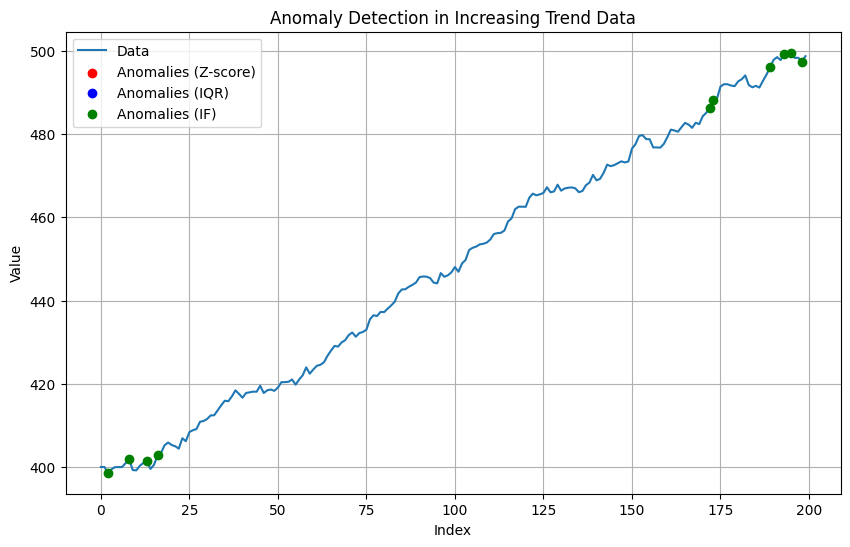

In [3]:

# Phương pháp phát hiện bất thường
def detect_anomalies(data):
    # Phát hiện bất thường bằng Z-score
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    z_anomalies = np.where(np.abs(z_scores) > 3)[0]  # Ngưỡng Z-score 3

    # Phát hiện bất thường bằng IQR (Interquartile Range)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_anomalies = np.where((data < lower_bound) | (data > upper_bound))[0]

    # Phát hiện bất thường bằng Isolation Forest
    model = IsolationForest(contamination=0.05)  # 5% dữ liệu được coi là bất thường
    data_reshaped = data.reshape(-1, 1)  # Reshape dữ liệu thành dạng 2D
    model.fit(data_reshaped)
    outliers = model.predict(data_reshaped)
    if_anomalies = np.where(outliers == -1)[0]

    # Trả về kết quả
    return z_anomalies, iqr_anomalies, if_anomalies

# Chạy phát hiện bất thường cho từng loại dữ liệu
datasets = [x_spike, x_mean, x_decreasing, x_increasing]
dataset_names = ["Spike", "Changing Mean", "Decreasing Trend", "Increasing Trend"]

for data, name in zip(datasets, dataset_names):
    print(f"Detecting anomalies in {name} data:")
    
    # Phát hiện bất thường
    z_anomalies, iqr_anomalies, if_anomalies = detect_anomalies(data)

    # In ra các chỉ số bất thường
    print(f"  Z-score anomalies: {z_anomalies}")
    print(f"  IQR anomalies: {iqr_anomalies}")
    print(f"  Isolation Forest anomalies: {if_anomalies}")
    
    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.plot(data, label="Data")
    plt.scatter(z_anomalies, data[z_anomalies], color='red', label="Anomalies (Z-score)", zorder=5)
    plt.scatter(iqr_anomalies, data[iqr_anomalies], color='blue', label="Anomalies (IQR)", zorder=5)
    plt.scatter(if_anomalies, data[if_anomalies], color='green', label="Anomalies (IF)", zorder=5)
    plt.title(f"Anomaly Detection in {name} Data")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA

# Phương pháp phát hiện bất thường
def detect_anomalies(data):
    # Phát hiện bất thường bằng Z-score
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    z_anomalies = np.where(np.abs(z_scores) > 3)[0]  # Ngưỡng Z-score 3

    # Phát hiện bất thường bằng IQR (Interquartile Range)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_anomalies = np.where((data < lower_bound) | (data > upper_bound))[0]

    # Phát hiện bất thường bằng Isolation Forest
    model = IsolationForest(contamination=0.05)  # 5% dữ liệu được coi là bất thường
    data_reshaped = data.reshape(-1, 1)  # Reshape dữ liệu thành dạng 2D
    model.fit(data_reshaped)
    outliers = model.predict(data_reshaped)
    if_anomalies = np.where(outliers == -1)[0]

    # Phát hiện bất thường bằng CUSUM
    cusum_pos = np.zeros(len(data))
    cusum_neg = np.zeros(len(data))
    threshold = 5  # Ngưỡng CUSUM
    k = 0.5  # Ngưỡng CUSUM cho phép thay đổi nhỏ
    mu = np.mean(data)  # Giá trị kỳ vọng

    for t in range(1, len(data)):
        cusum_pos[t] = max(0, cusum_pos[t-1] + (data[t] - mu - k))
        cusum_neg[t] = min(0, cusum_neg[t-1] + (data[t] - mu + k))

    cusum_pos_anomalies = np.where(cusum_pos > threshold)[0]
    cusum_neg_anomalies = np.where(cusum_neg < -threshold)[0]

    # Phát hiện bất thường bằng ARIMA
    model_arima = ARIMA(data, order=(5, 1, 0))  # ARIMA(5,1,0)
    model_arima_fit = model_arima.fit()
    forecast = model_arima_fit.forecast(len(data))
    residuals = np.abs(data - forecast)
    arima_anomalies = np.where(residuals > 3 * np.std(residuals))[0]  # Ngưỡng bất thường

    # Trả về kết quả
    return z_anomalies, iqr_anomalies, if_anomalies, cusum_pos_anomalies, cusum_neg_anomalies, arima_anomalies

# Dữ liệu giả lập (Xem ví dụ dữ liệu ở phía trên)
n = 200
x_spike = 100 + 5 * np.random.normal(0, 1, n)
x_spike[99] = 150
x_spike[100] = 250
x_spike[101] = 170

x_mean = np.zeros(n)
x_mean[:100] = 30 + 3 * np.random.normal(0, 1, 100)
x_mean[101:] = 50 + 3 * np.random.normal(0, 1, 99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

x_decreasing = np.zeros(n)
x_decreasing[0] = 400
for t in range(1, n):
    x_decreasing[t] = x_decreasing[t-1] - 0.5 - np.random.normal(0, 1)

x_increasing = np.zeros(n)
x_increasing[0] = 400
for t in range(1, n):
    x_increasing[t] = x_increasing[t-1] + 0.5 - np.random.normal(0, 1)

# Chạy phát hiện bất thường cho từng loại dữ liệu
datasets = [x_spike, x_mean, x_decreasing, x_increasing]
dataset_names = ["Spike", "Changing Mean", "Decreasing Trend", "Increasing Trend"]

for data, name in zip(datasets, dataset_names):
    print(f"Detecting anomalies in {name} data:")
    
    # Phát hiện bất thường
    z_anomalies, iqr_anomalies, if_anomalies, cusum_pos_anomalies, cusum_neg_anomalies, arima_anomalies = detect_anomalies(data)

    # In ra các chỉ số bất thường
    print(f"  Z-score anomalies: {z_anomalies}")
    print(f"  IQR anomalies: {iqr_anomalies}")
    print(f"  Isolation Forest anomalies: {if_anomalies}")
    print(f"  CUSUM positive anomalies: {cusum_pos_anomalies}")
    print(f"  CUSUM negative anomalies: {cusum_neg_anomalies}")
    print(f"  ARIMA anomalies: {arima_anomalies}")
    
    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.plot(data, label="Data")
    plt.scatter(z_anomalies, data[z_anomalies], color='red', label="Anomalies (Z-score)", zorder=5)
    plt.scatter(iqr_anomalies, data[iqr_anomalies], color='blue', label="Anomalies (IQR)", zorder=5)
    plt.scatter(if_anomalies, data[if_anomalies], color='green', label="Anomalies (IF)", zorder=5)
    plt.scatter(cusum_pos_anomalies, data[cusum_pos_anomalies], color='purple', label="Anomalies (CUSUM Positive)", zorder=5)
    plt.scatter(cusum_neg_anomalies, data[cusum_neg_anomalies], color='orange', label="Anomalies (CUSUM Negative)", zorder=5)
    plt.scatter(arima_anomalies, data[arima_anomalies], color='brown', label="Anomalies (ARIMA)", zorder=5)
    plt.title(f"Anomaly Detection in {name} Data")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [38]:
import numpy as np
from sklearn.cluster import KMeans

# Hàm tính độ bất thường của chuỗi con
def calculate_anomaly_score(sub_list, cluster):
    scores = []
    for sub in sub_list:
        score = np.mean([np.linalg.norm(np.array(sub) - np.array(cluster_c)) for cluster_c in cluster])
        scores.append(score)
    return scores

# Hàm phát hiện chuỗi con bất thường nhất trong bộ đệm
def EP_ILeader(buffer, R, Threshold):
    # Giả sử ta chỉ lấy các chuỗi con dài R từ chuỗi thời gian trong bộ đệm
    sub_list = [buffer[i:i+R] for i in range(len(buffer) - R + 1)]
    
    # Kiểm tra các chuỗi con có cùng chiều dài không
    for sub in sub_list:
        if len(sub) != R:
            raise ValueError("Các chuỗi con phải có cùng chiều dài R")

    # Nếu số chuỗi con trong bộ đệm ít hơn số cụm, giảm số cụm xuống
    n_clusters = min(3, len(sub_list))
    
    # Chuyển đổi sub_list thành mảng 2D (mỗi chuỗi con là một dòng)
    sub_list_2d = np.array([np.array(sub) for sub in sub_list])
    
    # Gom cụm các chuỗi con (chỉ khi có đủ chuỗi con)
    if len(sub_list) > 1:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sub_list_2d)
        cluster = kmeans.cluster_centers_
    else:
        cluster = sub_list_2d  # Nếu chỉ có 1 chuỗi con, sử dụng chính chuỗi con đó làm trung tâm cụm

    # Tính toán độ bất thường cho từng chuỗi con
    anomaly_scores = calculate_anomaly_score(sub_list, cluster)
    # Tìm chuỗi con có độ bất thường cao nhất
    max_anomaly_index = np.argmax(anomaly_scores)
    return sub_list[max_anomaly_index], max_anomaly_index, sub_list, cluster

# Hàm thực hiện phép vị tự cho chuỗi con
def homothety(sub, factor=1.5):
    # Đảm bảo phép vị tự chỉ thay đổi giá trị mà không thay đổi chiều dài
    return [x * factor for x in sub]

# Hàm thực hiện thuật toán SEP-ILeader
def SEP_ILeader(y, R, Threshold):
    # Bước 1: Khởi tạo bộ đệm B
    buffer = y[:R]  # Chỉ lấy đoạn đầu của chuỗi thời gian để khởi tạo bộ đệm
    Sub_List = []
    Cluster = []
    PositionofAnomaly = None
    
    # Bước 2: Phát hiện chuỗi con bất thường nhất
    sub, pos, Sub_List, Cluster = EP_ILeader(buffer, R, Threshold)
    PositionofAnomaly = pos
    print(f"Chuỗi con bất thường nhất ban đầu: {sub}, Vị trí: {pos}")
    
    # Lặp lại cho đến khi dừng
    while True:
        # Bước 4: Xử lý điểm cực trị trong bộ đệm
        if len(buffer) > R:
            last_extreme_point = buffer[-1]  # Điểm cực trị mới nhất
            if last_extreme_point > np.max(buffer):  # Nếu điểm cực trị là cực đại
                # Tìm điểm cực tiểu quan trọng kế tiếp
                min_point = np.min(buffer)
                sub = buffer[buffer.index(min_point):buffer.index(min_point)+R]
            else:  # Nếu điểm cực trị là cực tiểu
                # Tìm điểm cực đại quan trọng kế tiếp
                max_point = np.max(buffer)
                sub = buffer[buffer.index(max_point):buffer.index(max_point)+R]

            # Bước 10: Hình thành chuỗi con mới
            new_sub = homothety(sub)  # Biến đổi chuỗi con bằng phép vị tự

            # Đảm bảo rằng chuỗi con mới có chiều dài R (không thay đổi)
            if len(new_sub) != R:
                print(f"Lỗi chiều dài chuỗi con sau phép vị tự: {len(new_sub)}")
                raise ValueError(f"Chuỗi con mới phải có chiều dài {R}, nhưng hiện tại có chiều dài {len(new_sub)}")
            
            # Bước 12: Chèn chuỗi con vào cấu trúc cụm
            Sub_List.append(new_sub)
            
            # Kiểm tra lại tất cả chuỗi con có độ dài giống nhau
            for sub in Sub_List:
                if len(sub) != R:
                    print(f"Cảnh báo: Một chuỗi con có chiều dài không phải {R}. Chiều dài hiện tại: {len(sub)}")

            # Chuyển các chuỗi con thành mảng 2D
            sub_list_2d = np.array([np.array(sub) for sub in Sub_List])
            
            # Kiểm tra lại tất cả chuỗi con có độ dài giống nhau
            if len(sub_list_2d.shape) == 2:  # Chắc chắn rằng các chuỗi con có cùng chiều dài
                kmeans = KMeans(n_clusters=3, random_state=0).fit(sub_list_2d)
                Cluster = kmeans.cluster_centers_
            
            # Bước 13: Kiểm tra và xóa chuỗi con cũ nhất
            if len(Sub_List) > 1 and all(p not in buffer for p in Sub_List[0]):
                Sub_List.pop(0)  # Xóa chuỗi con cũ nhất ra khỏi Sub_List và Cluster

            # Bước 16: Tính hệ số bất thường cho mọi chuỗi con
            anomaly_scores = calculate_anomaly_score(Sub_List, Cluster)

            # Bước 17: Xuất ra chuỗi con có hệ số bất thường lớn nhất
            max_anomaly_index = np.argmax(anomaly_scores)
            print(f"Chuỗi con bất thường nhất hiện tại: {Sub_List[max_anomaly_index]}, Vị trí: {max_anomaly_index}")
        
        # Điều kiện dừng (có thể thay đổi tùy theo yêu cầu)
        if len(buffer) >= len(y):
            break
        buffer.append(y[len(buffer)])  # Cập nhật bộ đệm với điểm mới

    return Sub_List[max_anomaly_index], PositionofAnomaly

# Ví dụ sử dụng
y = [5, 6, 7, 8, 3, 2, 4, 9, 11, 10, 12, 6, 13, 7, 8, 14]  # Chuỗi thời gian mẫu
R = 3  # Kích thước chuỗi con
Threshold = 0.5  # Ngưỡng (có thể dùng trong việc gom cụm)

# Chạy thuật toán SEP-ILeader
result_sub, result_pos = SEP_ILeader(y, R, Threshold)
print(f"Chuỗi con bất thường nhất cuối cùng: {result_sub}, Vị trí: {result_pos}")


Chuỗi con bất thường nhất ban đầu: [5, 6, 7], Vị trí: 0
Lỗi chiều dài chuỗi con sau phép vị tự: 1


ValueError: Chuỗi con mới phải có chiều dài 3, nhưng hiện tại có chiều dài 1